In [ ]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sequential read
First, we compare the time taken for a sequential read of a video. We use the `sequential_compare.py` script for this.

In [ ]:
# FILE_TO_READ = join("./out/", "READ_RANDOM_SEEK.csv")
FILE_TO_READ = join("./out/", "READ_ENTIRE_VID.csv")
# FILE_TO_READ = join("./out/", "READ_UNIFORM_SEEK.csv")


In [ ]:
df = pd.read_csv(FILE_TO_READ)
df.head(5)


,Unnamed: 0,decoder,video,time,num_frames,num_threads,codec
0,0,decord_cpu,WUzgd7C1pWA,0.089853,327,1,original
1,1,tv_newAPI,WUzgd7C1pWA,0.150779,327,1,original
2,2,pyav,WUzgd7C1pWA,0.185106,327,1,original
3,3,tv_vr,WUzgd7C1pWA,0.176335,327,1,original
4,4,tv_pyav,WUzgd7C1pWA,0.232008,327,1,original


### Original videos
First we check overall time on original videos

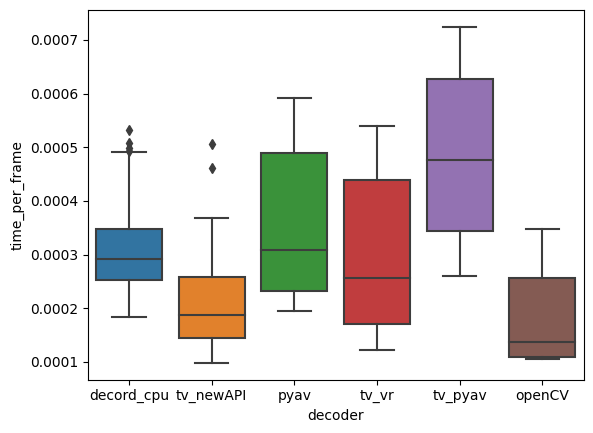

In [ ]:
sns.set_style("white")
df["time_per_frame"] = df['time'] / df['num_frames']
df_curr = df[df['codec'] == 'original']

ax = sns.boxplot(x="decoder", y="time_per_frame", data=df_curr)


### Does number of threads matter? 

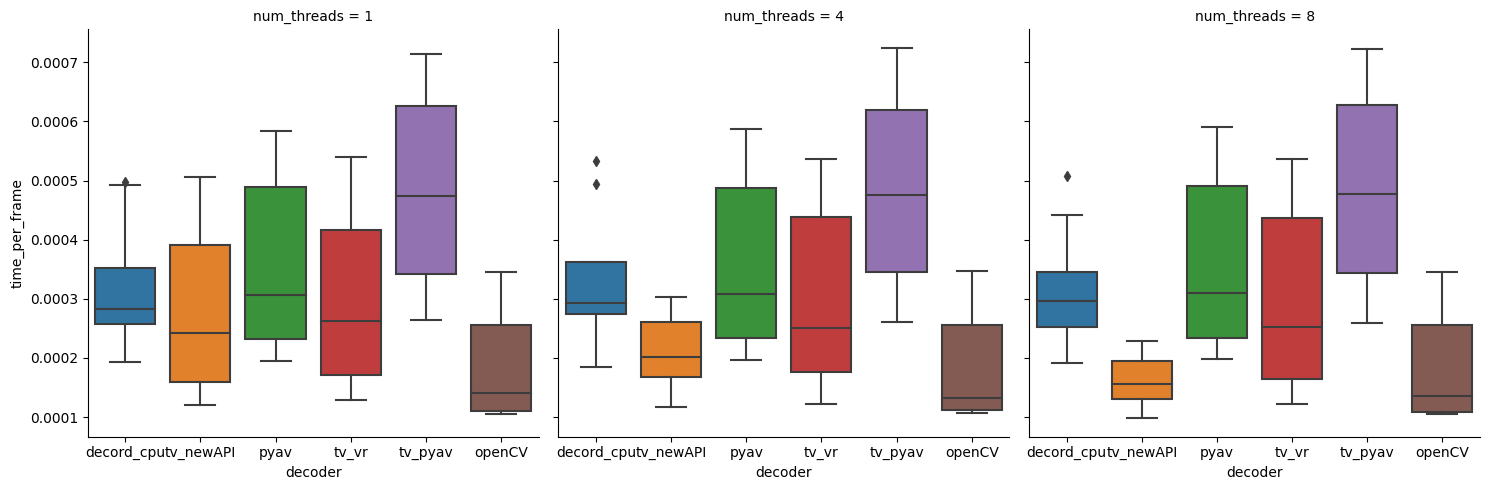

In [ ]:
sns.set_style("white")
ax = sns.catplot(x="decoder", y="time_per_frame", col="num_threads", kind="box", data=df_curr)

Can we see differences if we examine individual videos? 
(assuming original codecs)

/home/bjuncek/.conda/envs/vb/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


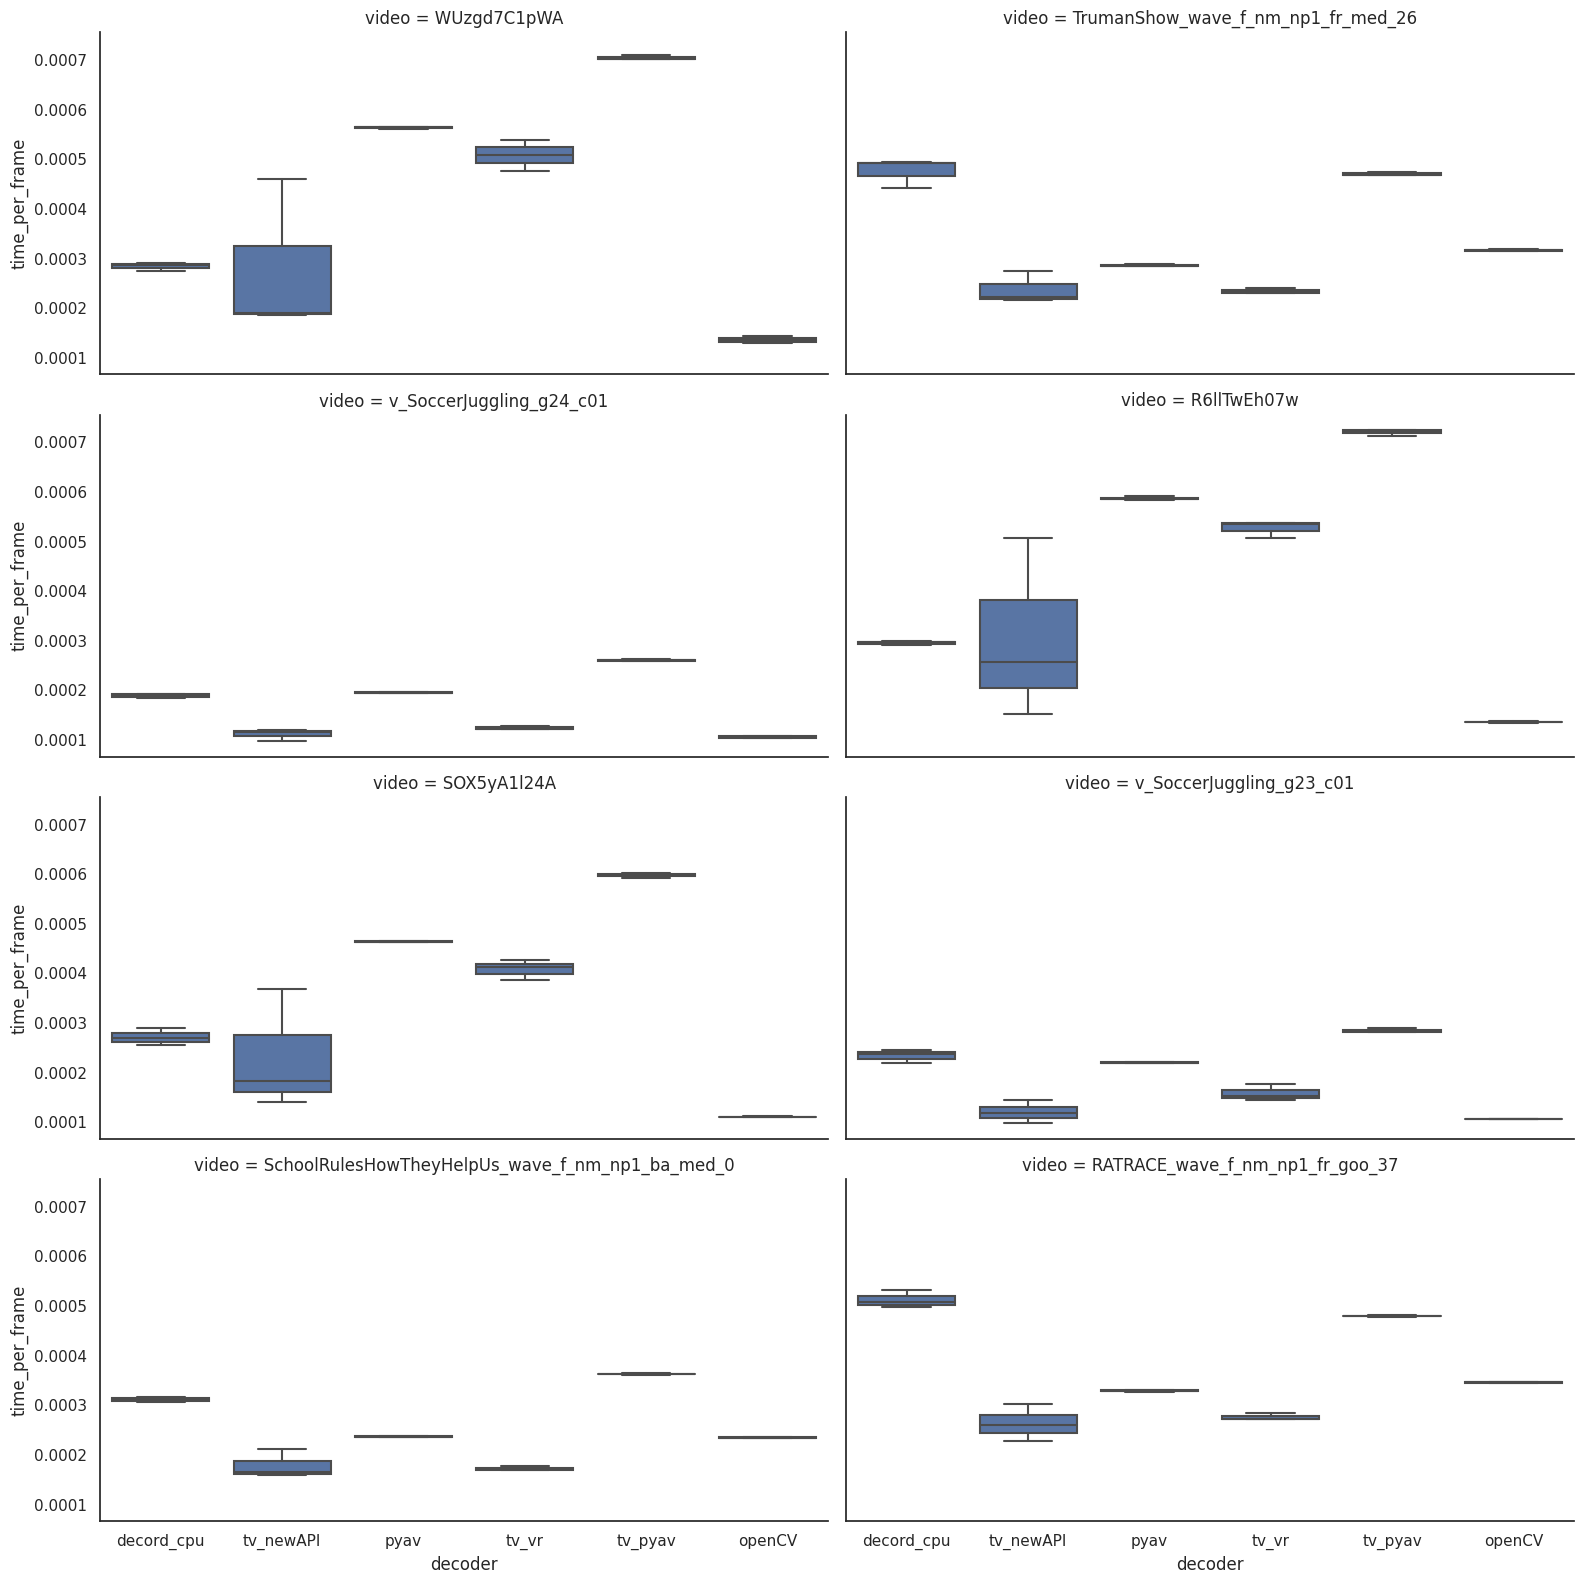

In [ ]:
sns.set_style("white")

g = sns.FacetGrid(df_curr, col="video", col_wrap=2, height=4, aspect=2, sharey=True)
g = g.map(sns.boxplot, "decoder", "time_per_frame", showfliers = False)


### And how about the encoding of the videos? 
(averaged over all number of threads)

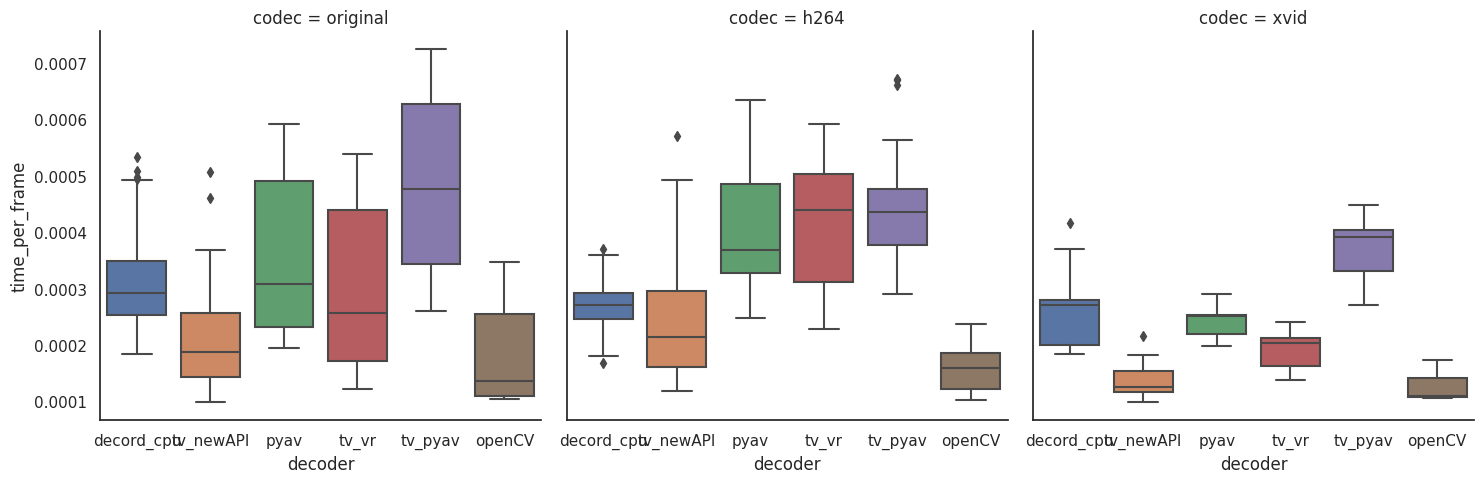

In [ ]:
sns.set_style("white")
ax = sns.catplot(x="decoder", y="time_per_frame", col="codec", kind="box", data=df)

or even better? 

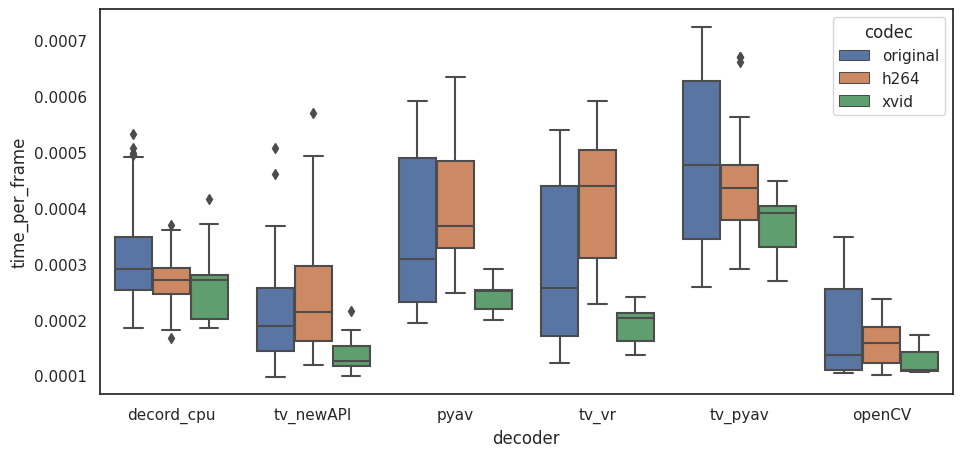

In [ ]:
sns.set(rc={'figure.figsize':(11,5)})
sns.set_style("white")


ax = sns.boxplot(x="decoder", y="time_per_frame", hue='codec', data=df)


In [1]:
sns.set_style("white")

g = sns.FacetGrid(df_curr, col="video", col_wrap=2, height=4, aspect=2, sharey=True)
g = g.map(sns.boxplot, "decoder", "time_per_frame", "codec", showfliers = False)


NameError: name 'sns' is not defined

# Random seedings
Now we compare the time taken for random seedings of a video. We use the `random_compare.py` script for this. Numbers are reported by extracting 3 non-sorted clips of k frames from each video, and each measurement is averaged over 10 runs.

In [30]:
FILE_TO_READ = join("./out/", "READ_RANDOM_SEEK.csv")
df = pd.read_csv(FILE_TO_READ)
df.head(5)

,Unnamed: 0,decoder,video,time,num_frames,num_threads,codec
0,0,pyav,WUzgd7C1pWA.mp4,0.060334,1,1,original
1,1,tv_newapi,WUzgd7C1pWA.mp4,0.066068,1,1,original
2,2,decord,WUzgd7C1pWA.mp4,0.021915,1,1,original
3,3,pyav,WUzgd7C1pWA.mp4,0.069154,5,1,original
4,4,tv_newapi,WUzgd7C1pWA.mp4,0.072228,5,1,original


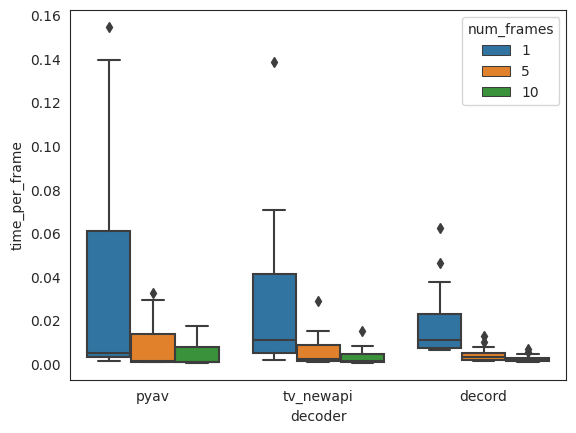

In [23]:
sns.set_style("white")
df["time_per_frame"] = df['time'] / df['num_frames']
df_curr = df[df['codec'] == 'original']

ax = sns.boxplot(x="decoder", y="time_per_frame", hue="num_frames", data=df_curr)

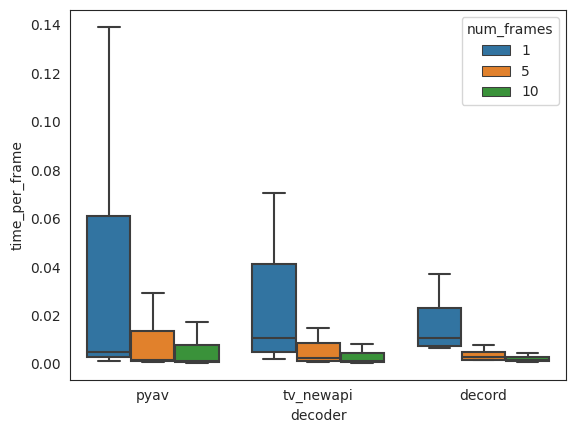

In [25]:
sns.set_style("white")
ax = sns.boxplot(x="decoder", y="time_per_frame", hue="num_frames", data=df_curr, showfliers = False)

## Num threads for 5 frame clips

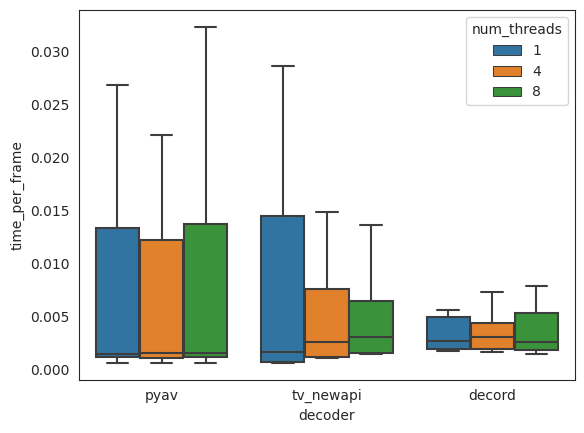

In [26]:
df_curr = df_curr[df_curr['num_frames'] == 5]

ax = sns.boxplot(x="decoder", y="time_per_frame", hue="num_threads", data=df_curr, showfliers = False)

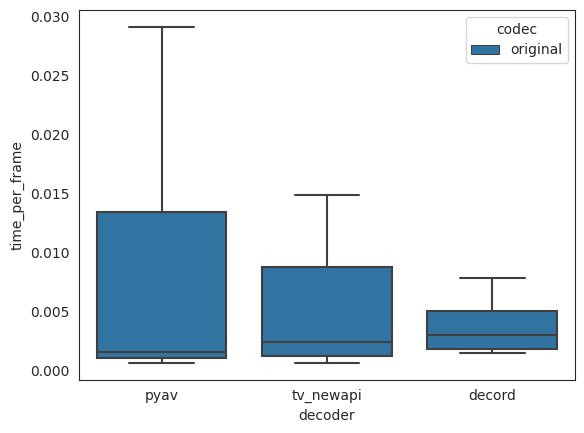

In [27]:
sns.set_style("white")

df = df[df['num_frames'] == 5]
ax = sns.boxplot(x="decoder", y="time_per_frame", hue="codec", data=df_curr, showfliers = False)

| **function**               | **return type**             | **return description**                     | **?decoding** | **?filling tensor with decoded values** |
|----------------------------|-----------------------------|--------------------------------------------|---------------|-----------------------------------------|
| `next_list`                | torch::List<torch::Tensor>  | torch::Tensor({h, w, 3}), torch::zero({0}) | Yes           | Yes                                     |
| `next_tensor`              | torch::Tensor               | torch::Tensor({h, w, 3})                   | Yes           | Yes                                     |
| `next_list_dummy_tensor`   | torch::List <torch::Tensor> | torch::ones({h, w, 3}), torch::zero({0})   | Yes           | No (calls torch::ones)                  |
| `next_tensor_dummy_tensor` | torch::Tensor               | torch::ones({h, w, 3})                     | Yes           | No (calls torch::ones)                  |
| `next_int_numframes`       | int64_T                     | 1 if decoded successfully, 0 otherwise     | Yes           | No                                      |

In [11]:
df["pyv4"] = df["time_per_frame"] * 1000
df['pyv4'][df.loader=="pyav"] = df['pyv4'][df.loader=="pyav"] + 0.00035

<ipython-input-11-8ec252515777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pyv4'][df.loader=="pyav"] = df['pyv4'][df.loader=="pyav"] + 0.00035
/home/bjuncek/miniconda3/envs/tvdev/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [81]:
df.head()

,Unnamed: 0,loader,video,time,num_frames,lib_version,time_per_frame,pyv4
0,0,pyav,RATRACE_wave_f_nm_np1_fr_goo_37.avi,0.034310,72,8.0.2,0.000477,0.000877
1,1,pyav,TrumanShow_wave_f_nm_np1_fr_med_26.avi,0.017768,48,8.0.2,0.000370,0.000770
2,2,pyav,SOX5yA1l24A.mp4,0.200105,332,8.0.2,0.000603,0.001003
3,3,pyav,SchoolRulesHowTheyHelpUs_wave_f_nm_np1_ba_med_...,0.022261,74,8.0.2,0.000301,0.000701
4,4,pyav,WUzgd7C1pWA.mp4,0.241122,327,8.0.2,0.000737,0.001137


In [22]:
df["time_per_frame"] = df['time'] / df['num_frames']

<AxesSubplot:xlabel='loader', ylabel='time_per_frame'>

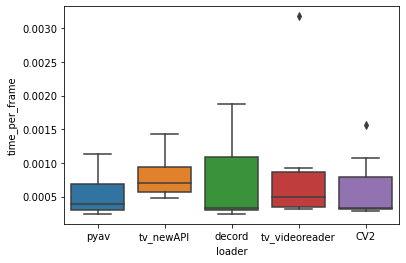

In [23]:
sns.boxplot(x="loader", y="time_per_frame", data=df)